  # Case Study on Regression


In [174]:
#The given dataset contains price of second-hand Hyundai grand i10 car with
#respect to year of making. Find the best linear relationship between year and
#price. Can you predict the possible price of a 2022 model second-hand grand i10?
#Please learn about lasso regression and create a model along with linear
#regression. Find out which one is performing better.


# linear regression

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# reading the file to python environment

In [177]:
data=pd.read_csv(r'C:\Users\Preethy\Downloads\carageprice.csv')

In [178]:
data.shape

(112, 2)

In [179]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [181]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [182]:
#checking for missing values

In [183]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [184]:
data.nunique()

Year      8
Price    35
dtype: int64

In [185]:
# a heat map is created to find out the correlation

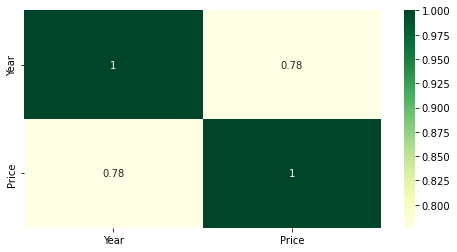

In [186]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,annot=True,cmap='YlGn')
plt.show()

In [187]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [188]:
# model creation

In [189]:
y= data['Price']
x= data.drop(['Price'],axis=1)

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)

[[0.71428571 0.36263736]
 [0.85714286 1.        ]
 [0.85714286 0.87912088]
 [0.71428571 0.36263736]
 [0.71428571 0.36263736]
 [0.28571429 0.10989011]
 [0.42857143 0.27472527]
 [0.57142857 0.6043956 ]
 [0.57142857 0.46153626]
 [0.57142857 0.6043956 ]
 [0.85714286 0.43956044]
 [0.71428571 0.43956044]
 [0.57142857 0.43956044]
 [0.85714286 0.65934066]
 [0.57142857 0.38461538]
 [0.57142857 0.43956044]
 [0.57142857 0.43956044]
 [0.57142857 0.54945055]
 [0.85714286 0.43956044]
 [0.57142857 0.43956044]
 [0.71428571 0.43956044]
 [0.85714286 0.43956044]
 [0.28571429 0.2967011 ]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.85714286 0.76923077]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.57142857 0.32967033]
 [0.57142857 0.54945055]
 [0.57142857 0.54945055]
 [0.57142857 0.40879121]
 [0.71428571 0.38461538]
 [1.         0.53846154]


In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
lr=LinearRegression()
model= lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [195]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [196]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [197]:
from sklearn.metrics import mean_squared_error,r2_score

In [198]:
print('mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

mean squared error is: 4326906256.829671
R squared value is: 0.36759313425902185


In [199]:
x2=data['Year']
y2=data['Price']

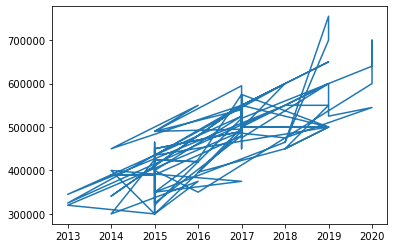

In [200]:
plt.plot(x2,y2)
plt.show()

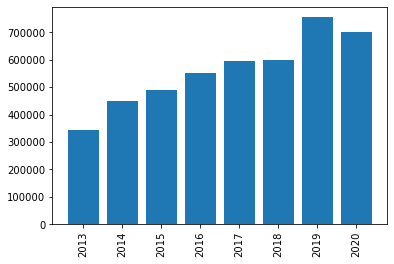

In [201]:
plt.bar(data['Year'],data['Price'])
plt.xticks(rotation=90)
plt.show()

In [202]:
# so the possible price of a 2022 model second-hand grand i10 is ~800000

# lasso regression

In [203]:
y2= data['Price']
x2= data.drop(['Price'],axis=1)

In [204]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [205]:
x2_train.shape

(89, 1)

In [206]:
y2_train.shape

(89,)

In [207]:
y2_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [208]:
from sklearn.linear_model import Lasso

In [209]:
lasso = Lasso(alpha=1.0)

In [210]:
lasso.fit(x2_train,y2_train)

Lasso()

In [211]:
y2_pred = lasso.predict(x2_test)

In [212]:
y2_pred

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [213]:
print('mean squared error is:',mean_squared_error(y2_test,y2_pred))
print('R squared value is:',r2_score(y2_test,y2_pred))

mean squared error is: 4326859771.015669
R squared value is: 0.3675999284778446


In [172]:
# In this case both linear and lasso regression is giving almost similar values.